In [88]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



In [89]:
# Importando los datos
df = pd.read_csv('riesgo_crediticio.csv')
df

,ingresos,ind_deuda_ing,riesgo
0,4.37,0.18,alto
1,9.56,0.82,bajo
2,7.59,0.50,bajo
3,6.39,0.76,bajo
4,2.40,0.36,alto
...,...,...,...
395,9.38,0.80,bajo
396,8.73,0.85,alto
397,4.86,0.55,bajo
398,7.76,0.66,bajo


<Axes: xlabel='ingresos', ylabel='ind_deuda_ing'>

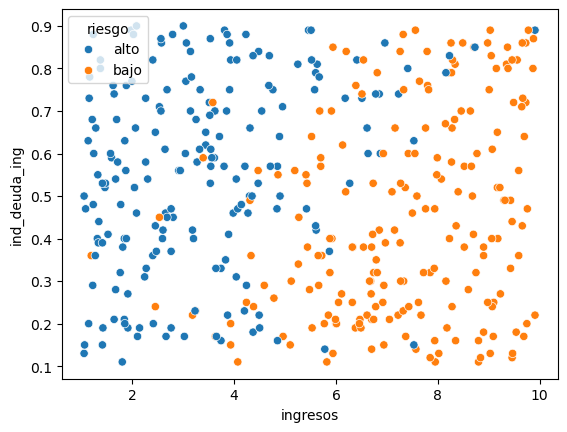

In [90]:
# Graficar los datos con seaborn
sns.scatterplot(data=df, x='ingresos', y='ind_deuda_ing', hue='riesgo')


In [91]:
# Contar la cantidad de categorías
df['riesgo'].value_counts()

riesgo
bajo    208
alto    192
Name: count, dtype: int64

<Axes: xlabel='ingresos'>

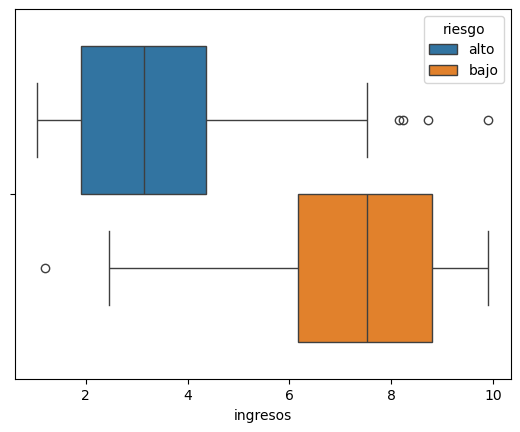

In [92]:
sns.boxplot(data=df, x='ingresos', hue='riesgo')

<Axes: xlabel='ind_deuda_ing'>

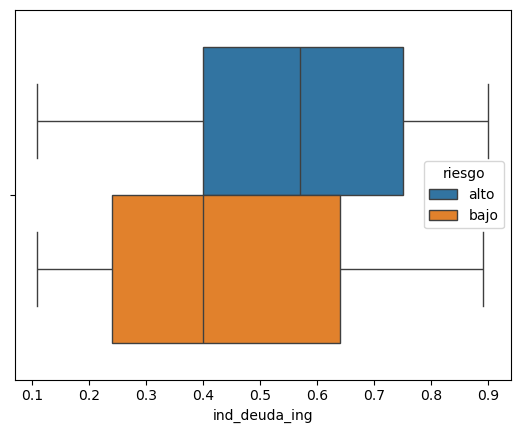

In [93]:
sns.boxplot(data=df, x='ind_deuda_ing', hue='riesgo')

In [94]:
X = df[['ingresos', 'ind_deuda_ing']].to_numpy()
y = df['riesgo'].to_numpy()

print(X.shape)
print(y.shape)

(400, 2)
(400,)


In [95]:
# Crear las particiones para el entrenamiento
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=(0.2), random_state=42)
print(X_tr.shape, y_tr.shape)
print(X_ts.shape, y_ts.shape)

(320, 2) (320,)
(80, 2) (80,)


In [96]:
# Entrenar el módelo con scikit-learn
modelo = LogisticRegression() # Instancia del módelo
# Entrenamiento del módelo, mediante el gradiente descendiente
modelo.fit(X_tr, y_tr)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [97]:
# Obtener las características del módelo
print("b (bias): ", modelo.intercept_)
print("Parámetros (ws): ", modelo.coef_)

b (bias):  [-4.31005995]
Parámetros (ws):  [[ 1.05999123 -2.62375687]]


In [98]:
# Test del módelo
print(modelo.classes_)
modelo.predict_proba(X_ts)

['alto' 'bajo']


array([[0.96827845, 0.03172155],
       [0.0365217 , 0.9634783 ],
       [0.00482081, 0.99517919],
       [0.1617588 , 0.8382412 ],
       [0.19047175, 0.80952825],
       [0.85540455, 0.14459545],
       [0.8160411 , 0.1839589 ],
       [0.05349922, 0.94650078],
       [0.06856468, 0.93143532],
       [0.03157665, 0.96842335],
       [0.04495756, 0.95504244],
       [0.12250003, 0.87749997],
       [0.93647498, 0.06352502],
       [0.97175418, 0.02824582],
       [0.9886448 , 0.0113552 ],
       [0.98149388, 0.01850612],
       [0.24228919, 0.75771081],
       [0.01677064, 0.98322936],
       [0.64802953, 0.35197047],
       [0.09656833, 0.90343167],
       [0.98123288, 0.01876712],
       [0.93749772, 0.06250228],
       [0.6927575 , 0.3072425 ],
       [0.08900971, 0.91099029],
       [0.53747323, 0.46252677],
       [0.06218318, 0.93781682],
       [0.08131929, 0.91868071],
       [0.8773521 , 0.1226479 ],
       [0.96881869, 0.03118131],
       [0.02401854, 0.97598146],
       [0.

In [99]:
# Predecir las categorias para cada elemento del conjunto de prueba
modelo.predict(X_ts)

array(['alto', 'bajo', 'bajo', 'bajo', 'bajo', 'alto', 'alto', 'bajo',
       'bajo', 'bajo', 'bajo', 'bajo', 'alto', 'alto', 'alto', 'alto',
       'bajo', 'bajo', 'alto', 'bajo', 'alto', 'alto', 'alto', 'bajo',
       'alto', 'bajo', 'bajo', 'alto', 'alto', 'bajo', 'bajo', 'bajo',
       'bajo', 'alto', 'bajo', 'bajo', 'bajo', 'alto', 'alto', 'alto',
       'bajo', 'bajo', 'bajo', 'bajo', 'alto', 'bajo', 'alto', 'alto',
       'alto', 'alto', 'alto', 'bajo', 'bajo', 'bajo', 'alto', 'bajo',
       'alto', 'bajo', 'bajo', 'alto', 'alto', 'alto', 'bajo', 'alto',
       'bajo', 'alto', 'bajo', 'alto', 'alto', 'bajo', 'alto', 'bajo',
       'alto', 'bajo', 'bajo', 'alto', 'alto', 'alto', 'bajo', 'bajo'],
      dtype=object)

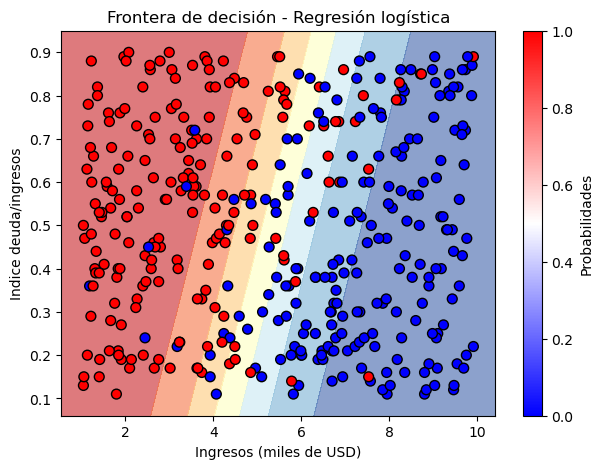

In [100]:
# Dibujando la frontera de decisioón

# Crear la grilla de valores
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.05, X[:, 1].max() + 0.05
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000),
                    np.linspace(y_min, y_max, 1000))

# predecir probabilidaddes con "Predict_proba"
Z = modelo.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Dibujar el set de datos y la frontera de decisión
y_num = df['riesgo'].map({"alto": 1, "bajo" : 0}).values
plt.figure(figsize=(7, 5))
plt.contourf(xx, yy, Z, cmap="RdYlBu", alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y_num, cmap="bwr", edgecolors="k", s=50)
plt.colorbar(label="Probabilidades")
plt.xlabel("Ingresos (miles de USD)")
plt.ylabel("Indice deuda/ingresos")
plt.title("Frontera de decisión - Regresión logística")
plt.show()

In [101]:
# verificando el desempeño del módelo
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_tr = modelo.predict(X_tr)
y_pred_ts = modelo.predict(X_ts)

print("Exactitud entrenamiento: ", accuracy_score(y_tr, y_pred_tr))
print("Exactitud prueba: ", accuracy_score(y_ts, y_pred_ts))

Exactitud entrenamiento:  0.884375
Exactitud prueba:  0.875


In [102]:
# Probando con nuevos valores
y_pred = modelo.predict([[8, 0.7]])
print(y_pred)

['bajo']


In [103]:
df

,ingresos,ind_deuda_ing,riesgo
0,4.37,0.18,alto
1,9.56,0.82,bajo
2,7.59,0.50,bajo
3,6.39,0.76,bajo
4,2.40,0.36,alto
...,...,...,...
395,9.38,0.80,bajo
396,8.73,0.85,alto
397,4.86,0.55,bajo
398,7.76,0.66,bajo
